In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the FER2013 dataset
data = pd.read_csv('Data Set/fer2013.csv')

# Extract the pixel and emotion columns from the dataset
pixels = data['pixels'].tolist()
emotions = pd.get_dummies(data['emotion']).values

# Convert the pixel strings to images
images = np.array([np.fromstring(pixel, dtype='uint8', sep=' ').reshape(48, 48, 1) for pixel in pixels])

# Split the dataset into training, validation, and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(images, emotions, test_size=0.1, random_state=42)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.1, random_state=42)

    

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator to the training data
datagen.fit(train_X)

# Define the batch size and number of epochs for training
batch_size = 64

In [110]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_55 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 22, 22, 32)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 20, 20, 64)       

In [111]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=50, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Test Accuracy: ", test_acc)

Epoch 1/50
909/909 [==============================] - 96s 102ms/step - loss: 2.1201 - accuracy: 0.2829 - val_loss: 2.4338 - val_accuracy: 0.2762
Epoch 2/50
909/909 [==============================] - 92s 101ms/step - loss: 1.6361 - accuracy: 0.3886 - val_loss: 1.5393 - val_accuracy: 0.4495
Epoch 3/50
909/909 [==============================] - 92s 101ms/step - loss: 1.4585 - accuracy: 0.4424 - val_loss: 1.3965 - val_accuracy: 0.4712
Epoch 4/50
909/909 [==============================] - 97s 106ms/step - loss: 1.3543 - accuracy: 0.4859 - val_loss: 1.3064 - val_accuracy: 0.4994
Epoch 5/50
909/909 [==============================] - 95s 105ms/step - loss: 1.2974 - accuracy: 0.5085 - val_loss: 1.3471 - val_accuracy: 0.4972
Epoch 6/50
909/909 [==============================] - 97s 106ms/step - loss: 1.2468 - accuracy: 0.5265 - val_loss: 1.4494 - val_accuracy: 0.4950
Epoch 7/50
909/909 [==============================] - 96s 106ms/step - loss: 1.2030 - accuracy: 0.5466 - val_loss: 1.2532 - val_ac

In [112]:
model.save("model_optimal1.h5")

1/1 [==============================] - 0s 70ms/step


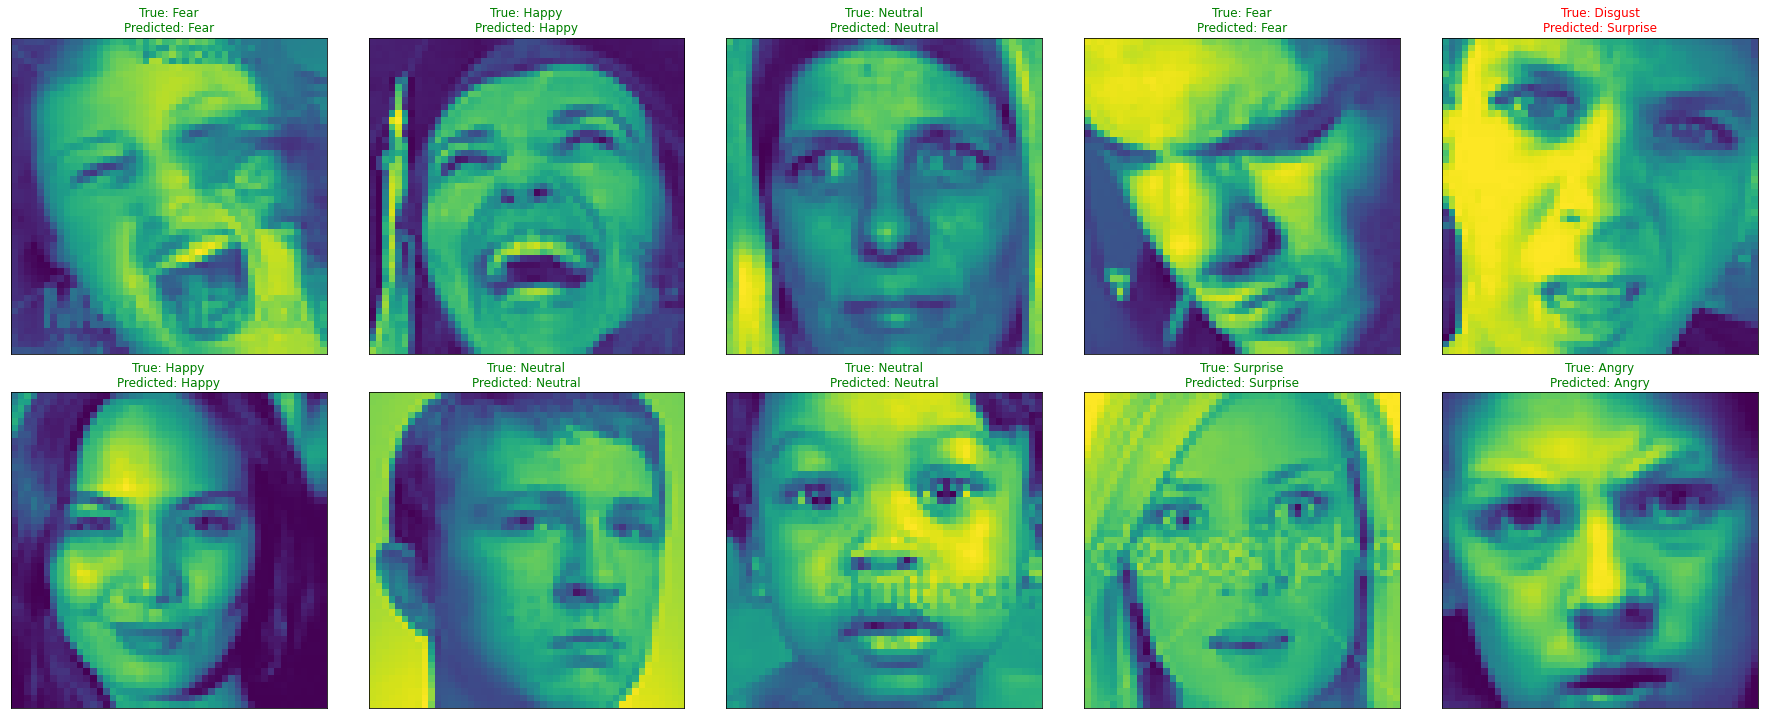

In [29]:
import random
import matplotlib.pyplot as plt

# Define a list of emotion classes
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Generate 8 random indices from the test set
random_indices = random.sample(range(len(test_X)), 10)

# Make predictions on the random test images
predictions = model.predict(test_X[random_indices])

# Plot the images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Get the index of the current image
    index = random_indices[i]
    
    # Get the true label of the current image
    true_label = emotion_classes[np.argmax(test_Y[index])]
    
    # Get the predicted label of the current image
    predicted_label = emotion_classes[np.argmax(predictions[i])]
    ax.imshow(test_X[index])
    if true_label == predicted_label:
          color = "green"
    else:
          color = "red"
            
    # Display the image and labels on the plot
    
    ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}',color=color)
    
plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.models import load_model
# Load the saved model
model1 = load_model('model_optimal1.h5')

1/1 [==============================] - 0s 25ms/step


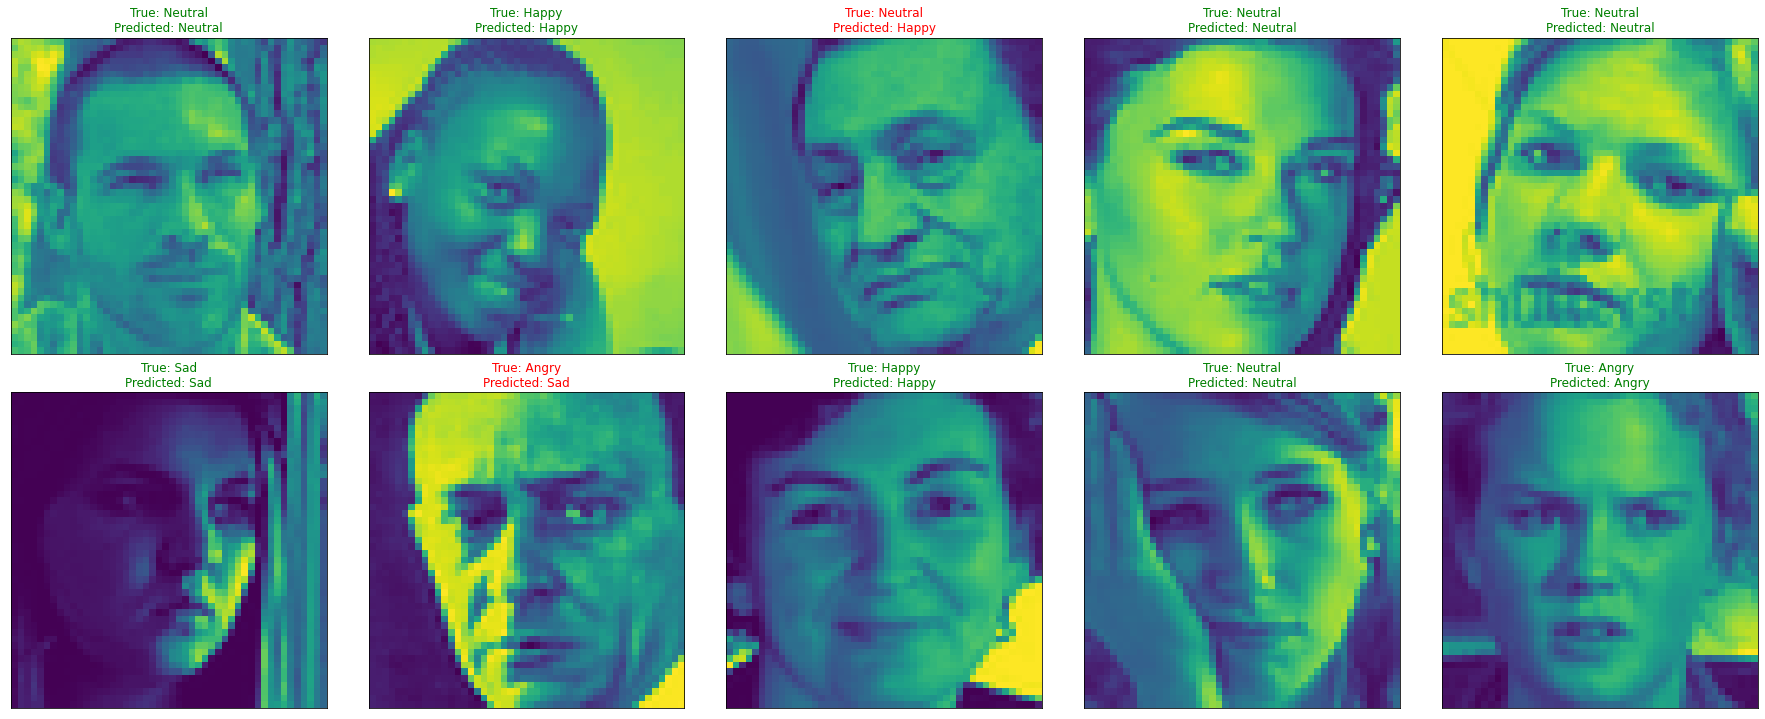

In [29]:
import random
import matplotlib.pyplot as plt

# Define a list of emotion classes
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Generate 8 random indices from the test set
random_indices = random.sample(range(len(test_X)), 10)

# Make predictions on the random test images
predictions = model1.predict(test_X[random_indices])

# Plot the images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Get the index of the current image
    index = random_indices[i]
    
    # Get the true label of the current image
    true_label = emotion_classes[np.argmax(test_Y[index])]
    
    # Get the predicted label of the current image
    predicted_label = emotion_classes[np.argmax(predictions[i])]
    ax.imshow(test_X[index])
    if true_label == predicted_label:
          color = "green"
    else:
          color = "red"
            
    # Display the image and labels on the plot
    
    ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}',color=color)
    
plt.tight_layout()
plt.show()

In [69]:
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Test Accuracy: ", test_acc)

113/113 [==============================] - 4s 31ms/step - loss: 1.5251 - accuracy: 0.6297
Test Accuracy:  0.6297018527984619


In [13]:
test_loss, test_acc = model1.evaluate(test_X, test_Y)
print("Test Accuracy: ", test_acc)

113/113 [==============================] - 3s 21ms/step - loss: 1.3534 - accuracy: 0.6216
Test Accuracy:  0.6216216087341309


In [3]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [31]:
import cv2
import numpy as np



# Load the cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start capturing video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: failed to capture image")
        break
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw rectangles around the faces and make predictions
    for (x, y, w, h) in faces:
        # Extract the face ROI
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1)) / 255.0
        
        # Make a prediction
        prediction = model1.predict(roi_gray)
        
        # Get the predicted emotion
        maxindex = int(np.argmax(prediction))
        emotion = Emotion_Classes[maxindex]

        # Draw the rectangle and predicted emotion text
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the resulting image
    cv2.imshow('frame', frame)
    
    # Exit the program when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step


In [13]:
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model1.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model1.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(512, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(7, activation='softmax'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 64)        36928     
                                                      

In [14]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=100, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y)
print("Test Accuracy: ", test_acc)

Epoch 1/100
221/909 [======>.......................] - ETA: 1:26 - loss: 2.0977 - accuracy: 0.2497

KeyboardInterrupt: 